In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
data = pd.read_csv(r'water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Understanding the different columns in the data

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Target Variable : Potability

### Overview of the data

In [3]:
data.shape

(3276, 10)

In [4]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### EDA AND DATA CLEANING

In [8]:
data.drop_duplicates(keep='first',inplace=True)

Treating the null values

In [9]:
for column in data.columns:
    print(column,'--->',data[column].nunique())
    print(data[column].unique(),'\n')
    

ph ---> 2785
[       nan 3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136] 

Hardness ---> 3276
[204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859] 

Solids ---> 3276
[20791.31898075 18630.05785797 19909.54173229 ... 33155.57821831
 11983.86937634 17404.17706105] 

Chloramines ---> 3276
[7.30021187 6.63524588 9.2758836  ... 7.35023323 6.30335653 7.50930586] 

Sulfate ---> 2495
[368.51644135          nan 356.88613564 ... 258.93060041 345.70025734
 359.94857437] 

Conductivity ---> 3276
[564.30865417 592.88535913 418.60621306 ... 432.04478305 402.88311312
 327.45976046] 

Organic_carbon ---> 3276
[10.37978308 15.18001312 16.86863693 ... 11.03906969 11.16894622
 16.14036763] 

Trihalomethanes ---> 3114
[86.99097046 56.32907628 66.42009251 ... 69.84540029 77.4882131
 78.69844633] 

Turbidity ---> 3276
[2.96313538 4.50065627 3.05593375 ... 3.2988755  4.70865847 2.30914906] 

Potability ---> 2
[0 1] 



So there are no special characters or unwanted inputs

<AxesSubplot:>

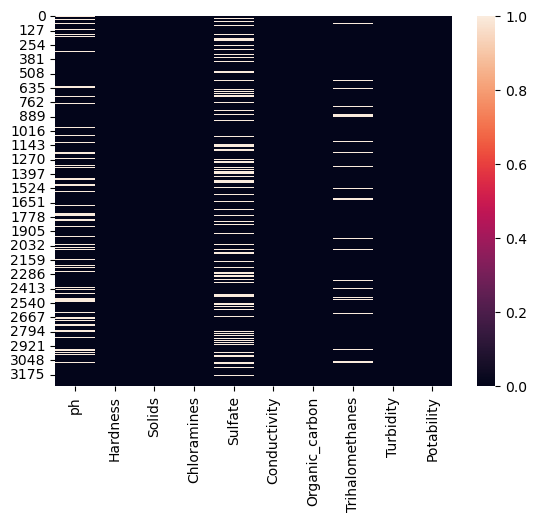

In [10]:
sns.heatmap(data.isnull())

There are null values in ph, Sulphate and Trihalomethanes

Let us check whether there are outliers or not

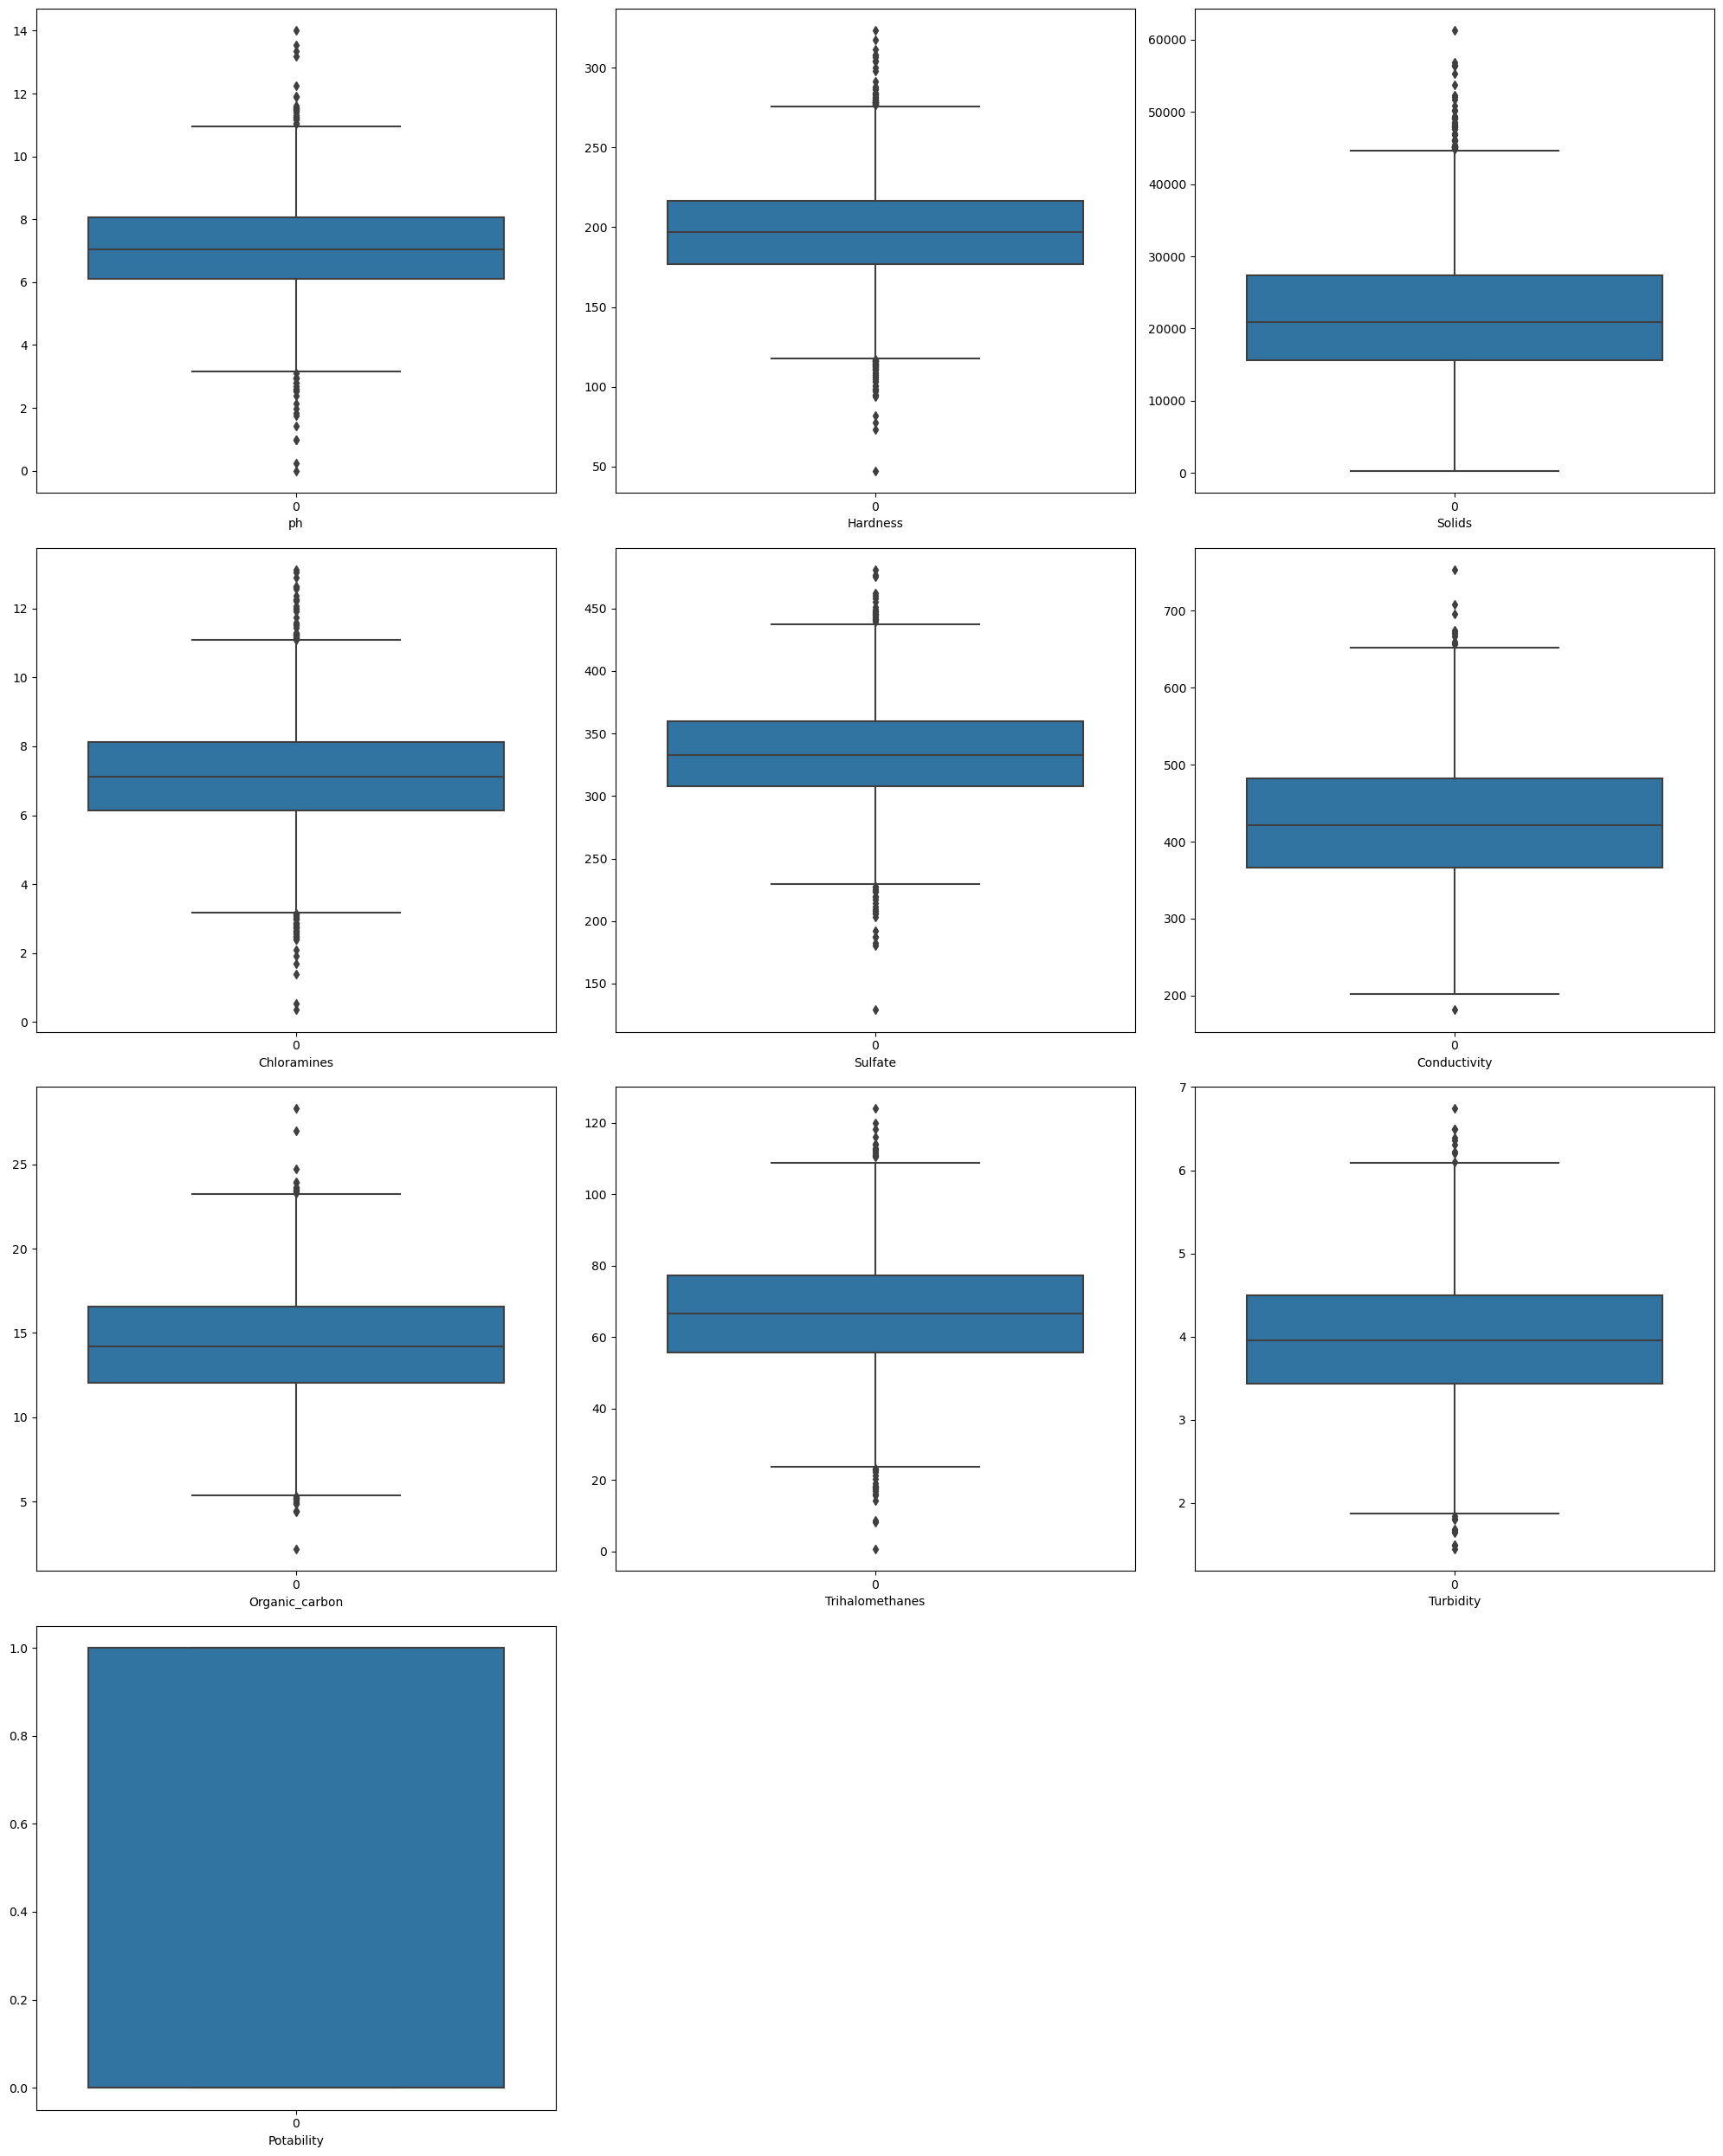

In [11]:
plt.figure(figsize=(20,25))
for i,col in enumerate(data.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=data[col])
    plt.xlabel(col)
    
    plt.tight_layout()


Since there are outliers present in the data we'll use median to impute the null values

lets remove extreme outliers if any are present

### Removing outliers manually using boxplot

In [12]:
data[(data['ph'] > 12.5) | (data['ph']<0.5)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
263,13.175402,47.432000,19237.949676,8.907020,375.147315,500.245952,12.083896,NaN,4.106924,1
726,0.227499,152.530111,39028.599340,3.462492,283.693782,443.029232,13.201943,62.322711,3.545741,1
2075,14.000000,235.677458,24008.992040,5.635029,381.097711,460.745267,13.452538,72.859468,3.170994,0
2868,13.541240,187.606792,13475.912773,6.756055,NaN,411.264465,15.142667,74.448559,3.529191,0
2895,13.349889,152.776455,18464.900775,6.717973,334.864070,450.846369,17.192564,85.883523,2.531075,0
3014,0.000000,214.846144,49456.587108,7.897539,NaN,583.448849,7.702328,77.712891,4.928840,0


In [13]:
data.drop(data[(data['ph'] > 12.5) | (data['ph']<0.5)].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [14]:
data.shape

(3270, 10)

In [15]:
data[data['Hardness'] < 70]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [16]:
data[data['Solids'] > 60000]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2599,NaN,159.399398,61227.196008,3.713594,312.976254,377.067972,17.246698,82.197233,3.860807,0


In [17]:
data.drop((data[data['Solids'] > 60000]).index, inplace=True)


In [18]:
data[data['Chloramines'] < 1]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
284,3.882631,243.807950,7751.809491,0.530351,NaN,341.291116,12.990592,60.109968,3.734001,1
2299,NaN,232.098339,16378.151576,0.352000,238.446564,454.555208,7.764144,55.876641,4.431829,1


In [19]:
data.drop((data[data['Chloramines'] <1]).index, inplace=True)

In [20]:
data[data['Sulfate'] < 150]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1552,8.942046,215.673786,56488.672413,3.231438,129.0,541.915468,9.313771,70.828374,4.354288,1


In [21]:
data.drop((data[data['Sulfate'] <150]).index, inplace=True)

In [22]:
data[data['Conductivity'] > 720]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2701,8.839584,246.066476,21179.762588,7.717662,343.047384,753.34262,16.917901,60.436032,3.118039,0


In [23]:
data.drop((data[data['Conductivity'] >720]).index, inplace=True)

In [24]:
data[(data['Organic_carbon'] >25) | (data['Organic_carbon']<3)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
783,5.140801,209.358561,21407.614287,4.415976,230.555856,378.897190,2.200000,86.737223,4.192257,1
1790,NaN,230.430762,14916.986091,9.618516,NaN,379.172804,28.300000,79.633064,3.864931,0
2233,6.380717,266.015410,21250.935634,4.854335,357.241027,358.185473,27.006707,59.937785,4.532020,0


In [25]:
data.drop((data[(data['Organic_carbon'] >25) | (data['Organic_carbon']<3)]).index, inplace=True)

In [26]:
data[data['Trihalomethanes'] < 5]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3029,7.869782,184.066169,18608.656297,7.411035,NaN,364.577603,17.580726,0.738,4.219576,0


In [27]:
data.drop((data[data['Trihalomethanes'] <5]).index, inplace=True)

In [28]:
data.shape

(3261, 10)

In [29]:
data.reset_index(drop=True, inplace=True)

In [30]:
data[(data['ph']>11) & (data['Potability']==1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
315,11.301794,77.459586,39227.619457,8.517986,337.501247,410.856114,14.326889,53.121260,3.309580,1
780,11.898078,228.132673,8296.550611,9.899637,346.649750,500.169210,15.486862,63.529460,3.024968,1
1158,11.244507,169.403655,43533.657845,5.888460,341.029600,336.446655,16.089710,59.494026,2.929953,1
3254,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


In [31]:
data[(data['ph']<3) & (data['Potability']==1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
352,2.798549,311.383956,26931.243483,7.116897,NaN,521.140524,14.235154,42.080353,3.663252,1
690,1.757037,147.581831,41538.242730,7.728177,376.012933,428.444823,10.828696,65.005840,2.967554,1
806,0.989912,133.216942,16922.853899,9.293289,444.375731,322.291191,10.430076,43.578466,5.160604,1
2292,2.974429,147.148675,17326.202253,2.498597,393.168745,375.411470,12.798187,76.413069,2.779902,1
2334,2.538116,100.806520,19872.854854,5.014023,418.000000,420.830866,13.980891,85.943192,2.840097,1


Ph level above 11 and below 3 is not safe for human consumption. Hence we need to change the potability to 0

In [32]:
data['Potability'] = data.apply(lambda x: 0 if (x['ph'] < 3 or x['ph'] > 11) else x['Potability'], axis=1)

### Now let us fill the null values

In [33]:
data.isnull().sum()

ph                 488
Hardness             0
Solids               0
Chloramines          0
Sulfate            776
Conductivity         0
Organic_carbon       0
Trihalomethanes    161
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

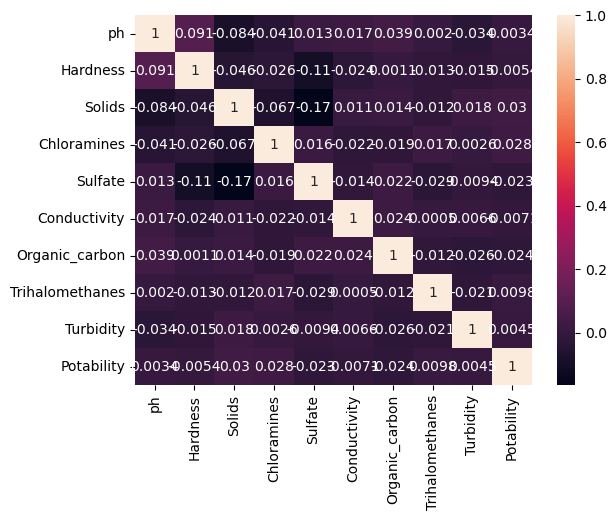

In [34]:
sns.heatmap(data.corr(),annot =True)

### We can see that none of them are correlated to each other. So we can't use groupby and fill the null values. So we'll use median

In [35]:
df= data.copy()

In [36]:
df['ph'].fillna(df['ph'].median(),inplace = True)
df['Sulfate'].fillna(df['Sulfate'].median(),inplace = True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(),inplace = True)

In [37]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Let's do statistical test to check which all independent variables are a good predictor of the target variable. Since the independent variables are continous and target variable is categorical with only 2 levels we'll use ttest.

In [38]:
import scipy
from scipy import stats

# t-test for two sample
from scipy.stats import ttest_ind

### Let's check which of the features are good predictors for the target variable

In [39]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [40]:
test_columns = df.describe().columns.to_list()

In [41]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035037,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [42]:
for i in test_columns:
    if i not in 'Potability':
        print(i)
        print(ttest_ind(df[i],df['Potability']))

ph
Ttest_indResult(statistic=250.521997258818, pvalue=0.0)
Hardness
Ttest_indResult(statistic=341.5781519663084, pvalue=0.0)
Solids
Ttest_indResult(statistic=144.08737307160737, pvalue=0.0)
Chloramines
Ttest_indResult(statistic=234.0096491927996, pvalue=0.0)
Sulfate
Ttest_indResult(statistic=529.6814060724408, pvalue=0.0)
Conductivity
Ttest_indResult(statistic=301.3169121954643, pvalue=0.0)
Organic_carbon
Ttest_indResult(statistic=238.9475196240014, pvalue=0.0)
Trihalomethanes
Ttest_indResult(statistic=239.29181732929266, pvalue=0.0)
Turbidity
Ttest_indResult(statistic=222.06976855699043, pvalue=0.0)


### Since all are having p-value less than 0.05 which is the level of significance, we can say that all the features are good predictors for the target variable

<AxesSubplot:xlabel='Potability', ylabel='count'>

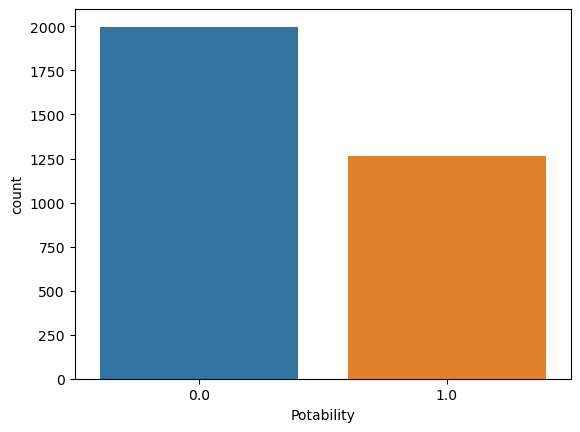

In [43]:
sns.countplot(data.Potability)

Target variable is also somewhat balanced. So no need to perform oversampling

### Now let's apply Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score

In [45]:
x = df.drop('Potability',axis=1)

In [46]:
y = df['Potability']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2282, 9), (979, 9), (2282,), (979,))

In [49]:
y_train.value_counts()

0.0    1394
1.0     888
Name: Potability, dtype: int64

In [50]:
y_test.value_counts()

0.0    604
1.0    375
Name: Potability, dtype: int64

In [51]:
model1=DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

In [53]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65       604
         1.0       0.46      0.52      0.49       375

    accuracy                           0.59       979
   macro avg       0.57      0.57      0.57       979
weighted avg       0.60      0.59      0.59       979

[[380 224]
 [181 194]]


### Here we have got an accuracy of 59%. Now let's apply some hyperparameters and prune the decision tree and check whether we can improve the accuracy. 

[Text(0.38918145860695524, 0.9833333333333333, 'X[4] <= 285.414\ngini = 0.475\nsamples = 2282\nvalue = [1394, 888]'),
 Text(0.06349931475559616, 0.95, 'X[2] <= 26861.846\ngini = 0.491\nsamples = 192\nvalue = [83, 109]'),
 Text(0.04659661946094107, 0.9166666666666666, 'X[0] <= 7.313\ngini = 0.488\nsamples = 114\nvalue = [66, 48]'),
 Text(0.02984620070047206, 0.8833333333333333, 'X[1] <= 218.691\ngini = 0.414\nsamples = 82\nvalue = [58, 24]'),
 Text(0.01827318410232983, 0.85, 'X[5] <= 371.677\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.009745698187909243, 0.8166666666666667, 'X[0] <= 7.037\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.004872849093954621, 0.7833333333333333, 'X[3] <= 9.866\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.0024364245469773106, 0.75, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.007309273640931932, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.014618547281863865, 0.7833333333333333, 'X[1] <= 152.892\ngini = 0.444\n

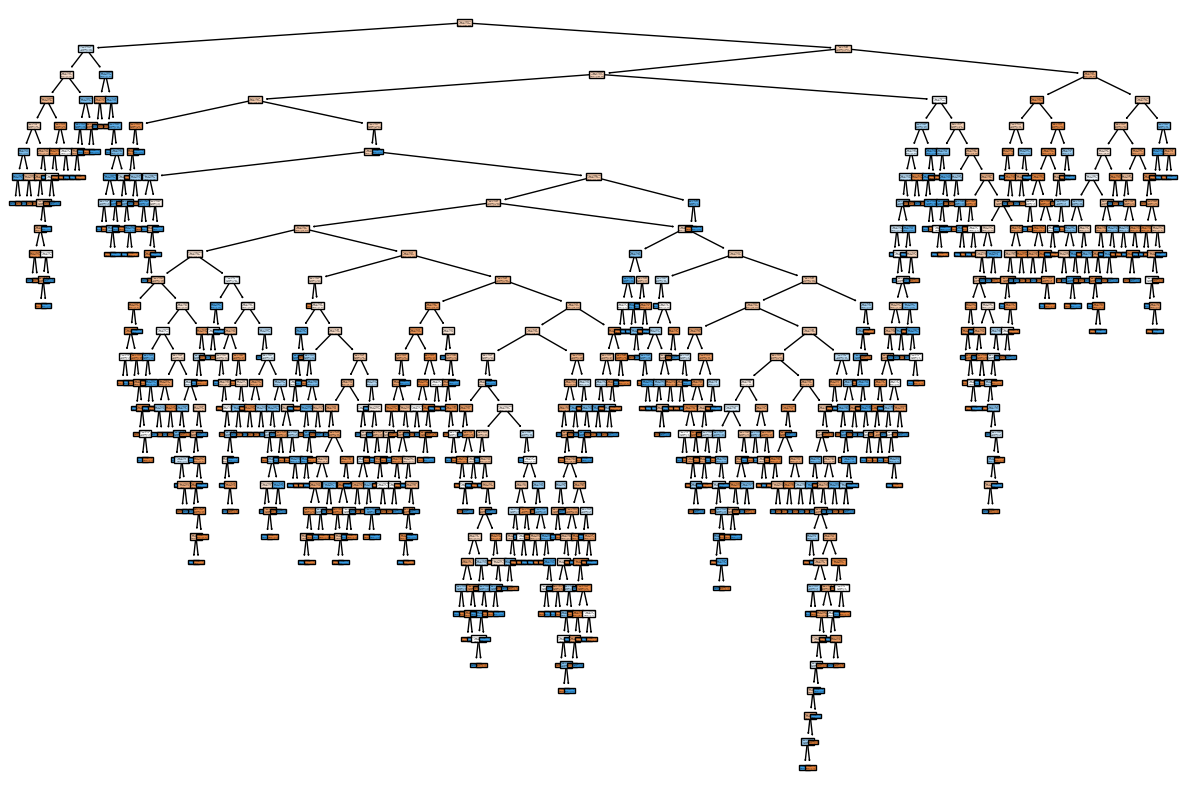

In [57]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model1,filled=True)

### We can see that it's a huge tree and definitely overfitting will be there. So we need to apply pruning and other hyperparameters to get better models

In [58]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    }

In [59]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(model1,param_grid=parameter,cv=5,scoring='accuracy')

In [60]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [61]:
cv.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'best'}

In [63]:
y_train_pred=cv.predict(X_train)
y_test_pred = cv.predict(X_test)

In [64]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.94      0.76       604
         1.0       0.60      0.14      0.23       375

    accuracy                           0.64       979
   macro avg       0.62      0.54      0.50       979
weighted avg       0.62      0.64      0.56       979

[[569  35]
 [322  53]]


### Hence after giving some hyperparameters our models accuracy has increased to 64% from 59%